## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [44]:
from tensorflow.python.summary.summary_iterator import summary_iterator

# Path to your .tfevents file
tfevents_path = "../final-runs/custom_kanto/events.out.tfevents.custom_kanto_run.0"

# Read the file and print available tags and data
print("Reading tfevents file...\n")
for event in summary_iterator(tfevents_path):
    for value in event.summary.value:
        print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


Reading tfevents file...

Step: 35, Tag: Batch Loss, Value: 5.508311748504639
Step: 45, Tag: Batch Loss, Value: 4.3643670082092285
Step: 55, Tag: Batch Loss, Value: 3.828767776489258
Step: 65, Tag: Batch Loss, Value: 3.5488433837890625
Step: 1, Tag: Epoch Training Loss, Value: 4.18869161605835
Step: 1, Tag: Epoch Training Accuracy, Value: 11.555636405944824
Step: 1, Tag: Precision, Value: 10.275175094604492
Step: 1, Tag: Recall, Value: 10.181236267089844
Step: 1, Tag: F1 Score, Value: 9.827051162719727
Step: 1, Tag: Learning Rate, Value: 0.0010000000474974513
Step: 2, Tag: Epoch Validation Accuracy, Value: 13.145952224731445
Step: 2, Tag: Precision, Value: 19.338855743408203
Step: 2, Tag: Recall, Value: 11.602212905883789
Step: 2, Tag: F1 Score, Value: 9.457240104675293
Step: 1, Tag: Per-Class Accuracy, Value: 0.0
Step: 1, Tag: Worst Performing Classes/text_summary, Value: 0.0
Step: 1, Tag: Class Accuracy/Abra, Value: 0.0
Step: 1, Tag: Class Accuracy/Aerodactyl, Value: 2.17391300201416

In [6]:
# Vizualize the tags... we kinda already knew this but lets still do it for the novelty

tags = set()
for event in summary_iterator(tfevents_path):
    for value in event.summary.value:
        tags.add(value.tag)

print("Available Tags:")
print(tags)


Available Tags:
{'Class Accuracy/Psyduck', 'Class Accuracy/Parasect', 'Class Accuracy/Cubone', 'Class Accuracy/Drowzee', 'Class Accuracy/Raichu', 'Class Accuracy/Fearow', 'Class Accuracy/Magnemite', 'Class Accuracy/Shellder', 'Class Accuracy/Arcanine', 'Class Accuracy/Dragonair', 'Class Accuracy/Geodude', 'Per-Class Accuracy', 'Class Accuracy/Krabby', 'F1 Score', 'Class Accuracy/Nidoran-f', 'Class Accuracy/Dodrio', 'Class Accuracy/Zapdos', 'Class Accuracy/Slowbro', 'Class Accuracy/Eevee', 'Class Accuracy/Mankey', 'Batch Loss', 'Epoch Validation Accuracy', 'Class Accuracy/Golduck', 'Class Accuracy/Muk', 'Class Accuracy/Seel', 'Class Accuracy/Bellsprout', 'Class Accuracy/Butterfree', 'Class Accuracy/Oddish', 'Class Accuracy/Machamp', 'Class Accuracy/Rapidash', 'Class Accuracy/Charmeleon', 'Class Accuracy/Electabuzz', 'Class Accuracy/Starmie', 'Class Accuracy/Jynx', 'Class Accuracy/Persian', 'Class Accuracy/Venonat', 'Class Accuracy/Rhydon', 'Class Accuracy/Farfetchd', 'Class Accuracy/Gol

Epoch 1: Training Loss = 4.18869161605835
Epoch 1: Training Accuracy = 11.555636405944824
Epoch 2: Validation Accuracy = 13.145952224731445
Epoch 2: Training Loss = 3.075047731399536
Epoch 2: Training Accuracy = 27.475038528442383
Epoch 3: Validation Accuracy = 41.67764663696289
Epoch 3: Training Loss = 2.582961082458496
Epoch 3: Training Accuracy = 43.26667022705078
Epoch 4: Validation Accuracy = 54.0330810546875
Epoch 4: Training Loss = 2.246891498565674
Epoch 4: Training Accuracy = 52.76272964477539
Epoch 5: Validation Accuracy = 57.53184127807617
Epoch 5: Training Loss = 2.0404043197631836
Epoch 5: Training Accuracy = 58.127140045166016
Epoch 6: Validation Accuracy = 64.83677673339844
Epoch 6: Training Loss = 1.8515468835830688
Epoch 6: Training Accuracy = 63.383209228515625
Epoch 7: Validation Accuracy = 63.738834381103516
Epoch 7: Training Loss = 1.7102301120758057
Epoch 7: Training Accuracy = 66.2293930053711
Epoch 8: Validation Accuracy = 70.51676177978516
Epoch 8: Training Los

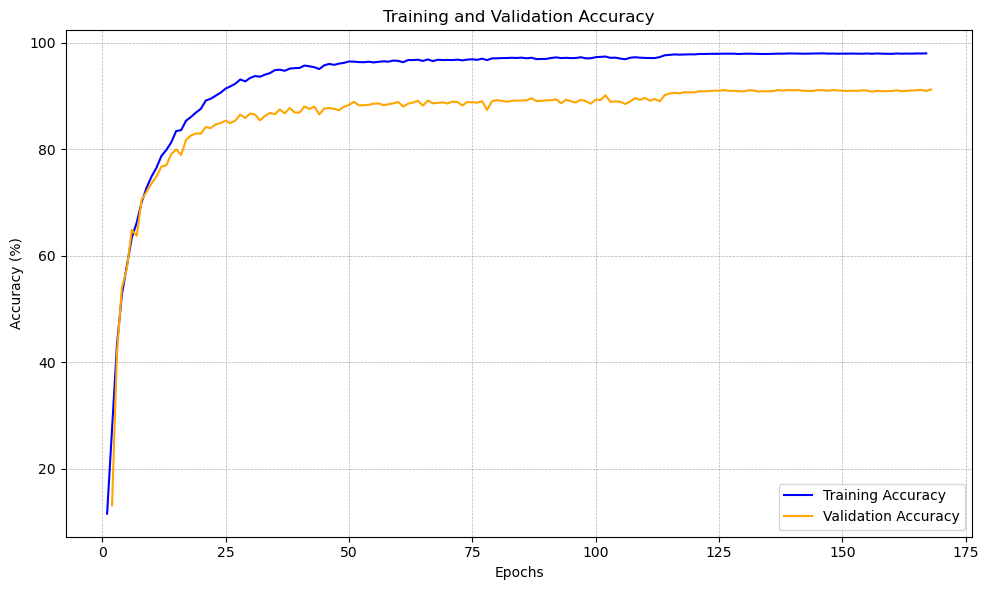

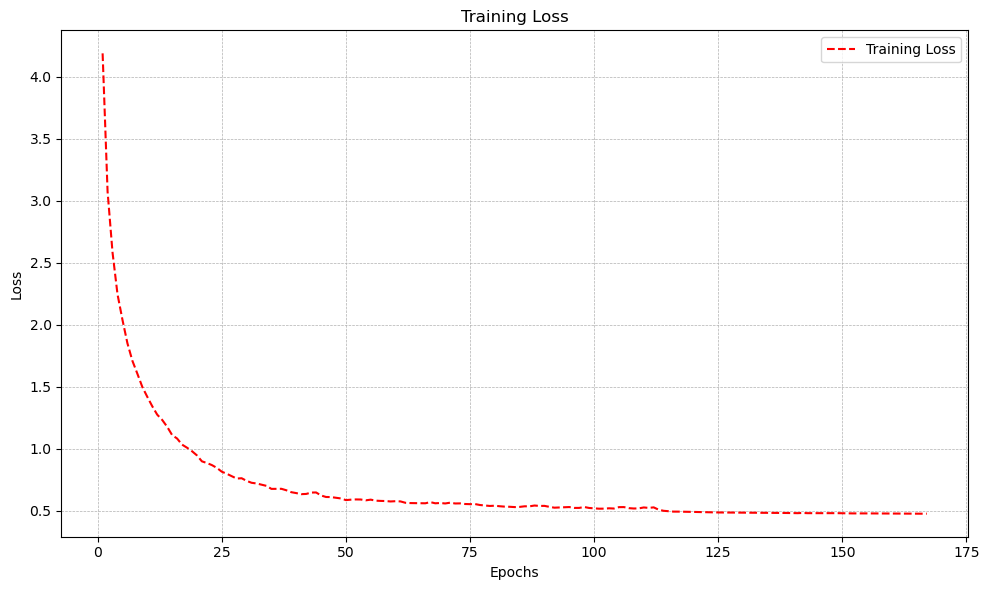

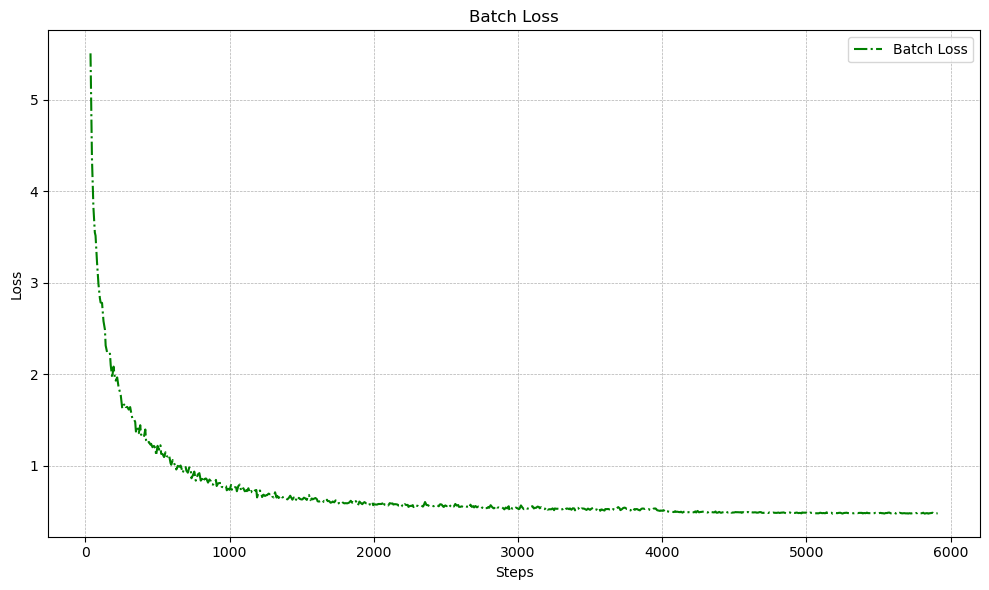

In [41]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for summary in summary_iterator(tfevents_path):
    for value in summary.summary.value:
        if value.tag == "Epoch Training Accuracy":  # Training accuracy
            epoch_steps_train.append(summary.step)
            print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
            epoch_train_accuracy.append(value.simple_value)
        elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
            print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
            epoch_steps_val.append(summary.step)
            epoch_val_accuracy.append(value.simple_value)
        elif value.tag == "Epoch Training Loss":  # Training loss
            print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
            epoch_train_loss.append(value.simple_value)
        elif value.tag == "Batch Loss":  # Batch loss
            batch_steps_train.append(summary.step)
            batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 3: Batch Loss
plt.figure(figsize=(10, 6))
plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Batch Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

